In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("data.csv")

In [8]:
student_names = list(df["Student Name"].unique())
subjects = list(df["Subject"].unique())
subject_categories = list(df["Subject Category"].unique())
terms = list(df["Term"].unique())
grades = list(df["Grade"].unique())

# Predict Grade for Subject

Student: Sarah
--------------------------------------------------
Subject: English
.........................
39.0% chance of getting the grade A
19.0% chance of getting the grade B
19.0% chance of getting the grade C
8.0% chance of getting the grade D
16.0% chance of getting the grade E
Subject: Spanish
.........................
39.0% chance of getting the grade A
19.0% chance of getting the grade B
19.0% chance of getting the grade C
8.0% chance of getting the grade D
16.0% chance of getting the grade E
Subject: Math
.........................
39.0% chance of getting the grade A
19.0% chance of getting the grade B
19.0% chance of getting the grade C
8.0% chance of getting the grade D
16.0% chance of getting the grade E
Subject: Physics
.........................
39.0% chance of getting the grade A
19.0% chance of getting the grade B
19.0% chance of getting the grade C
8.0% chance of getting the grade D
16.0% chance of getting the grade E
Subject: Geography
.........................
39.0

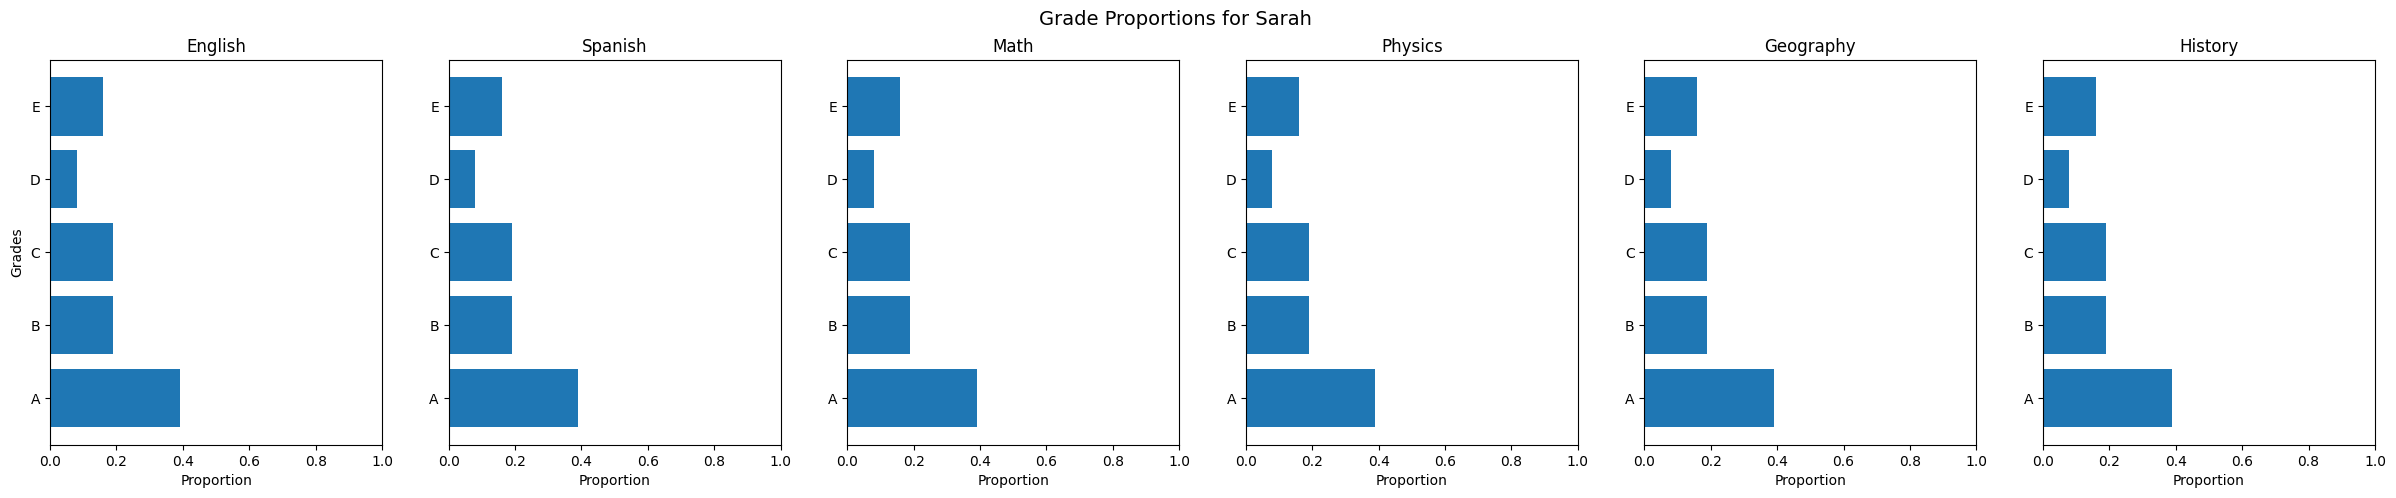

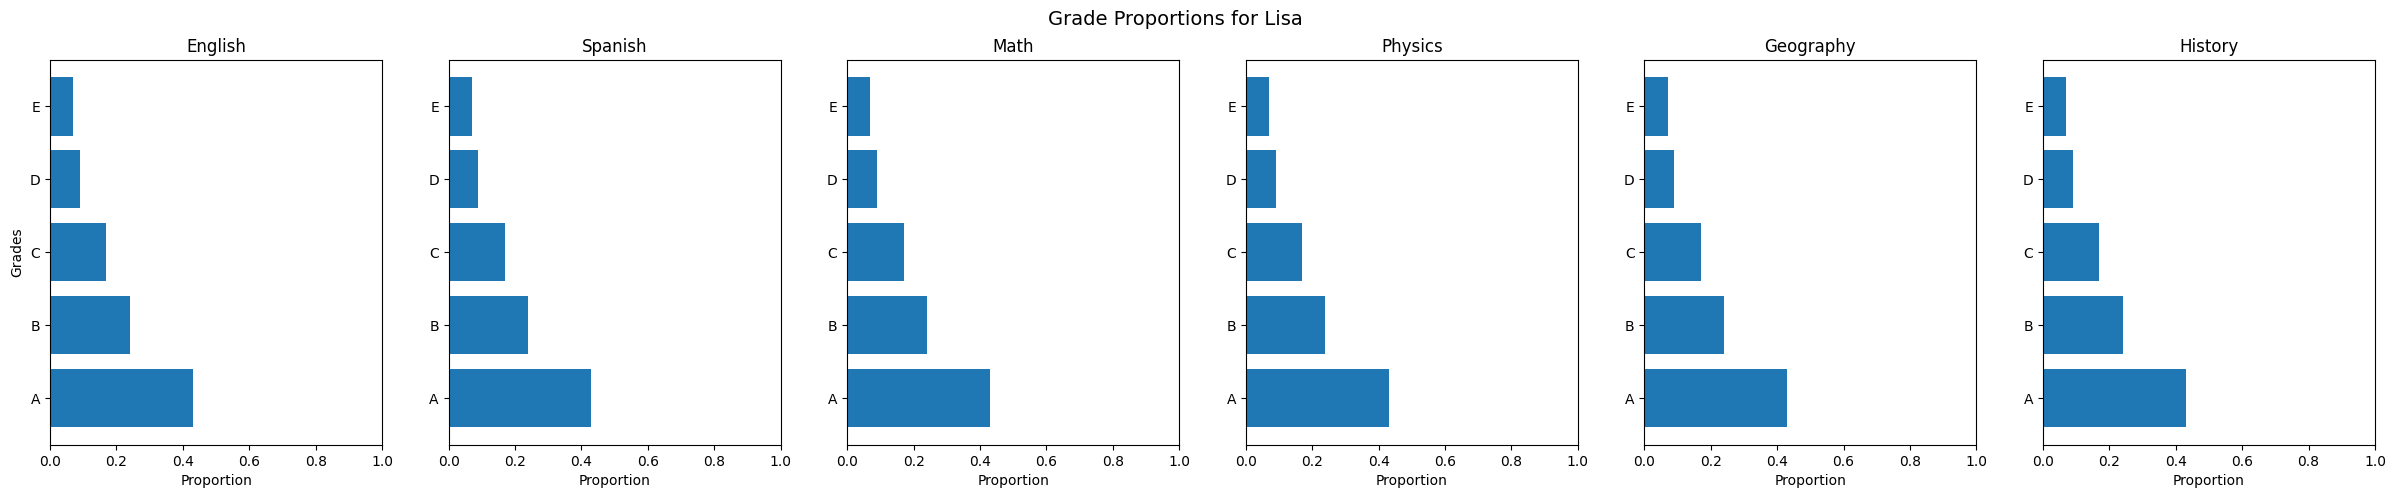

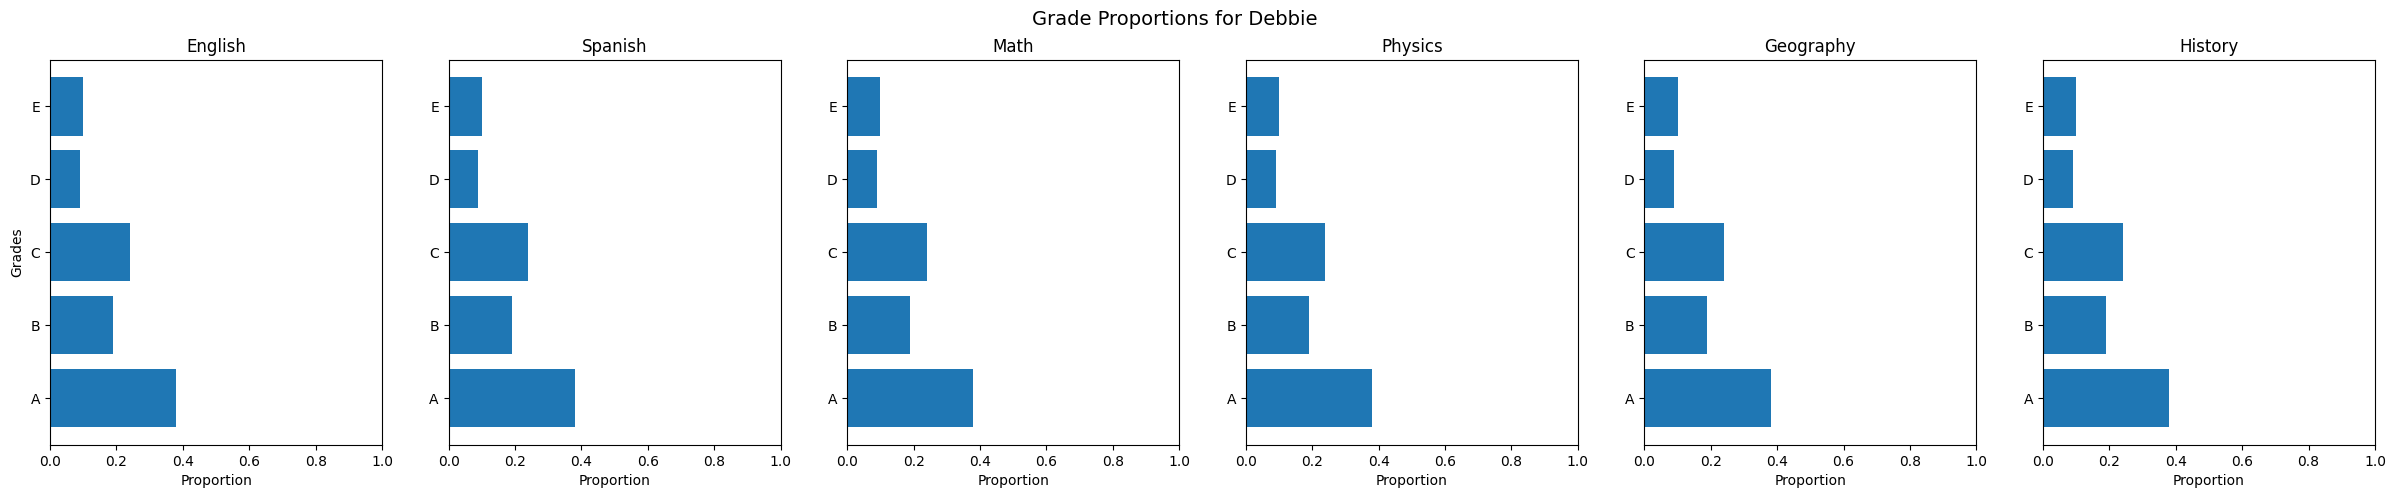

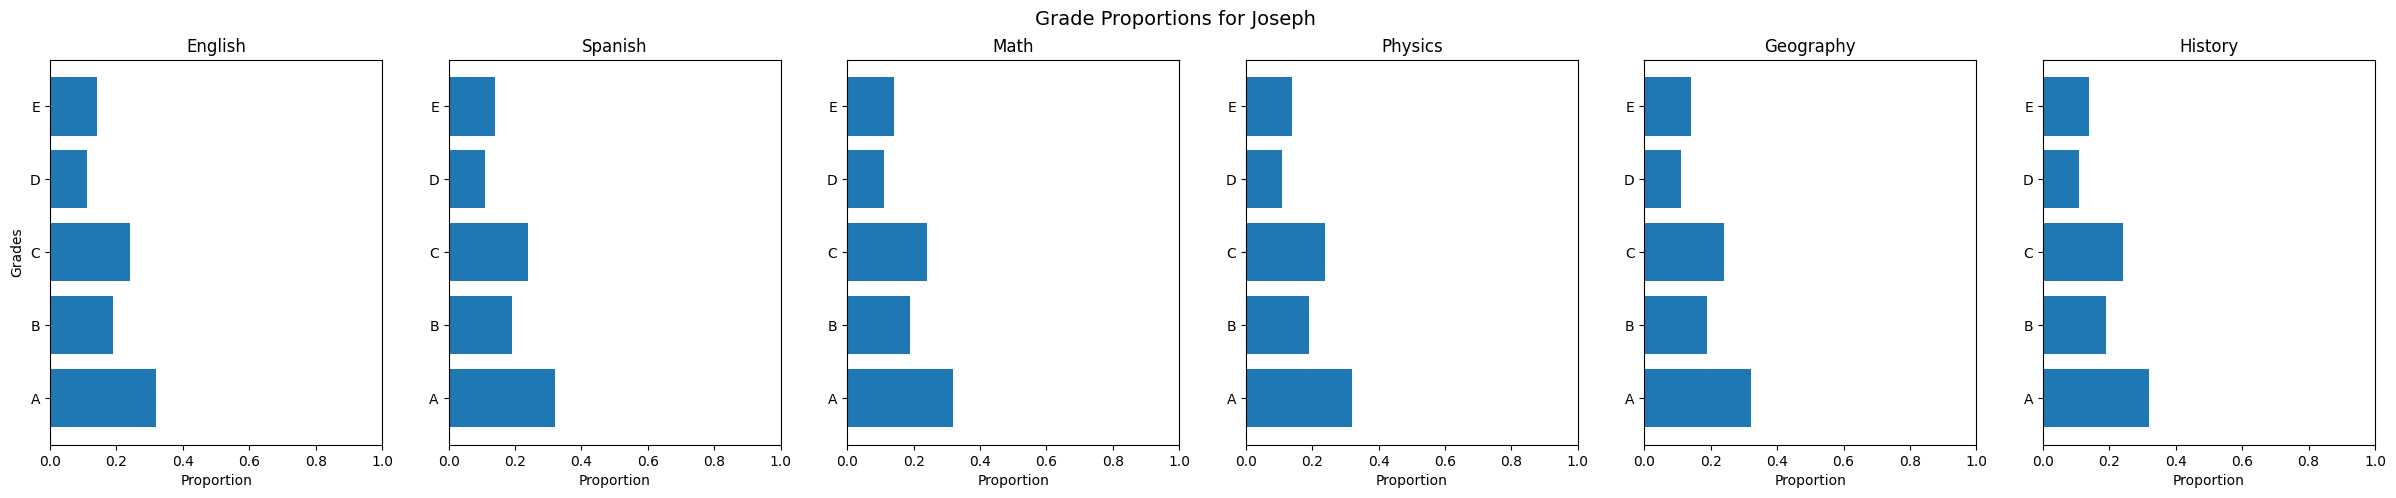

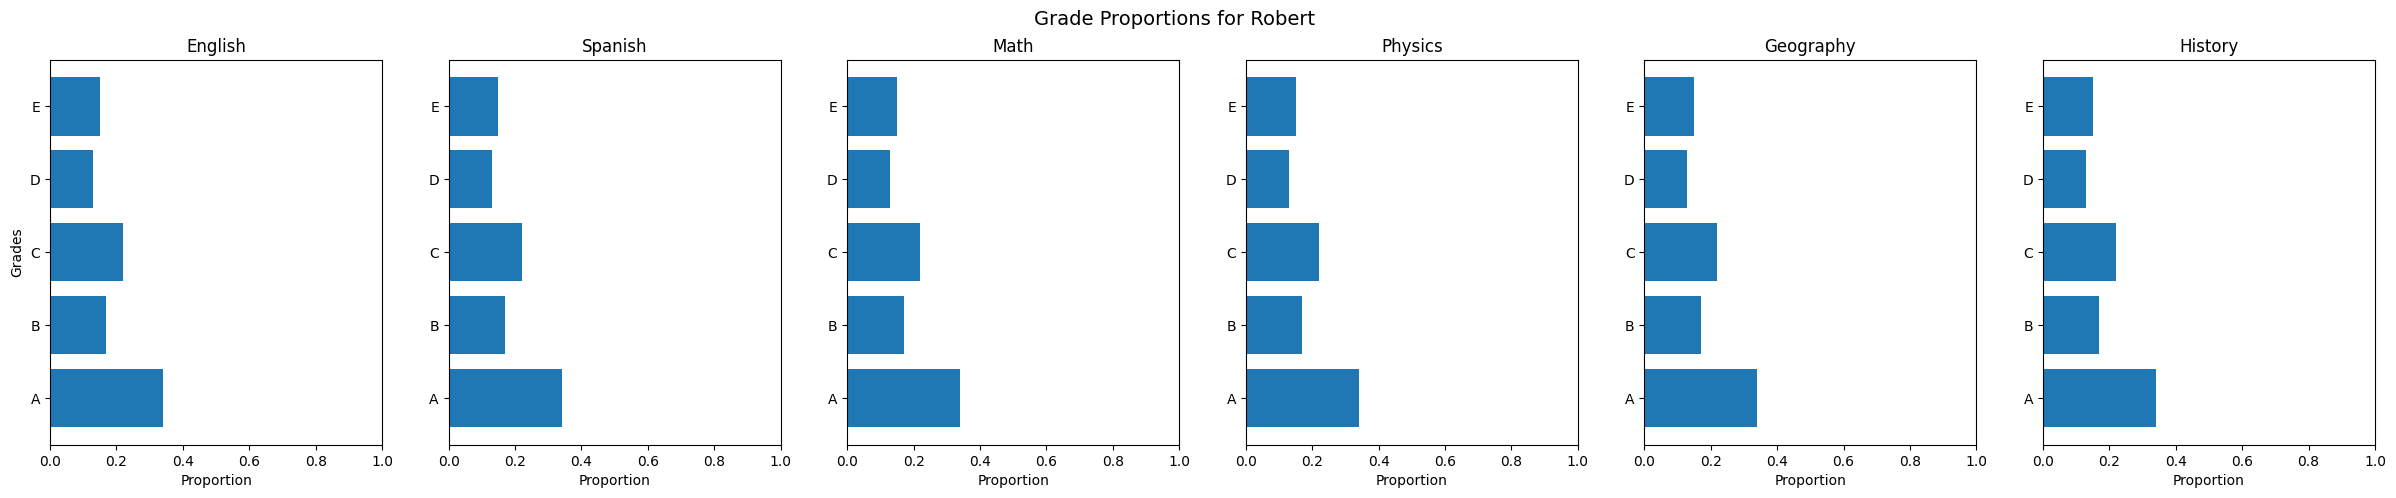

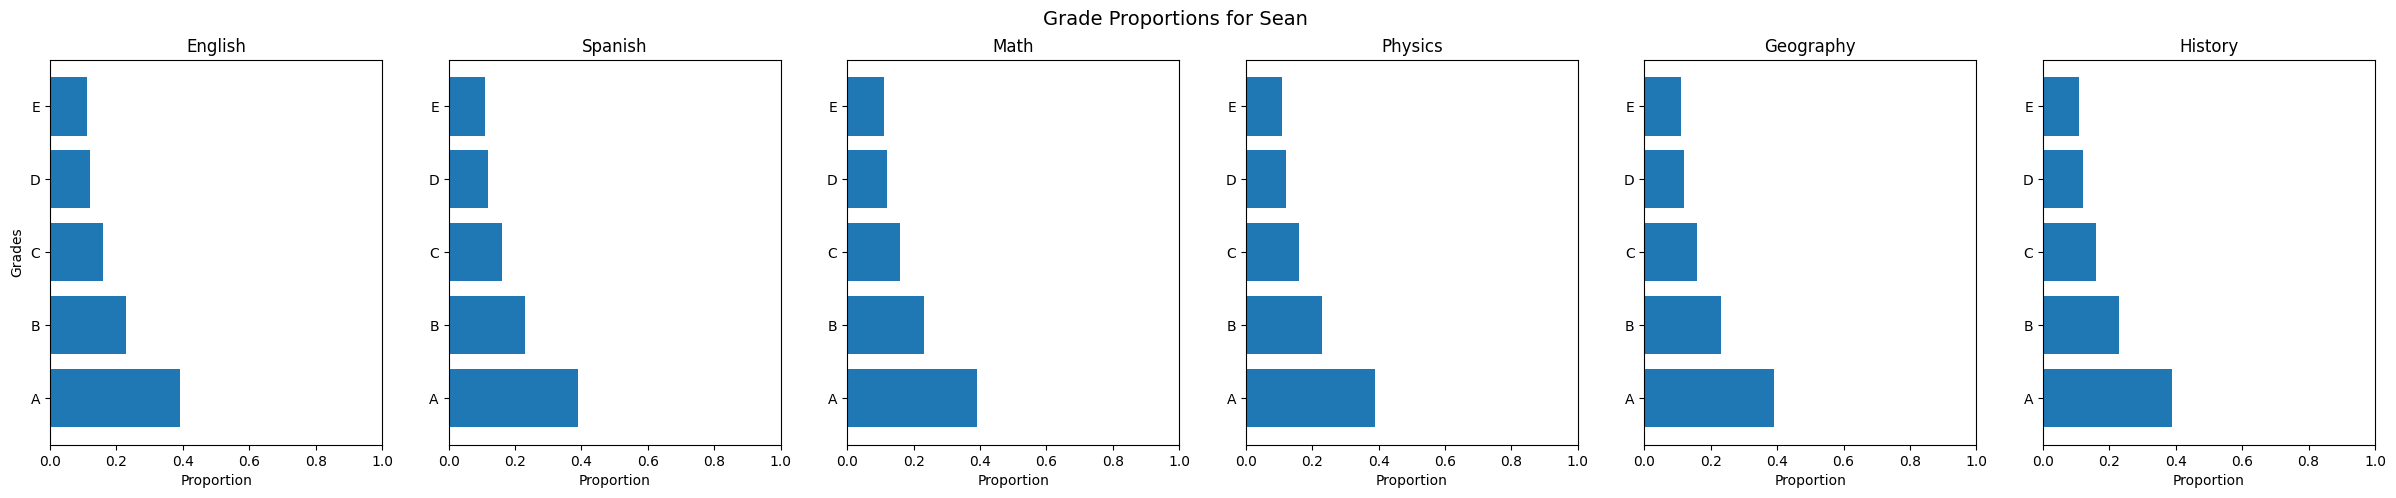

In [9]:
# Loop through each student
for student_name in student_names:
    student_df = df[df["Student Name"] == student_name]
    print(f"Student: {student_name}")
    print("-" * 50)

    # Create subplots for all subjects of the student
    fig, axes = plt.subplots(1, len(subjects), figsize=(5 * len(subjects), 5))
    fig.suptitle(f"Grade Proportions for {student_name}", fontsize=14)

    # Ensure axes is iterable even if there is only one subject
    if len(subjects) == 1:
        axes = [axes]

    for i, subject in enumerate(subjects):
        # subject_df = student_df[
        #     (student_df["Subject"] == subject) & (student_df["Class"] == 1)
        # ]
        subject_df = student_df[
            student_df["Subject"] == subject
        ]
        proportions_df = (
            student_df["Grade"].value_counts(normalize=True).round(2).sort_index()
        )

        print(f"Subject: {subject}")
        print("." * 25)

        for index, value in proportions_df.items():
            print(f"{round(value * 100, 0)}% chance of getting the grade {index}")

        # Plot each subject's grade distribution as a horizontal bar chart
        axes[i].barh(proportions_df.index, proportions_df.values)
        axes[i].set_title(subject)
        axes[i].set_xlabel("Proportion")
        axes[i].set_xlim(0, 1)  # Since proportions are between 0 and 1

    # Set common y-label
    axes[0].set_ylabel("Grades")

    # Show the complete plot
    # plt.show()

    print("." * 25)
    print("")
    print("=" * 50)

# Predict Grade for each subject using the term as a time factor

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Sorting the data by term (simulating time series)
df_time = df.sort_values(by="Grade")

# Encoding categorical variables
le_subject = LabelEncoder()
df_time["Subject"] = le_subject.fit_transform(df_time["Subject"])

le_category = LabelEncoder()
df_time["Subject Category"] = le_category.fit_transform(df_time["Subject Category"])

le_term = LabelEncoder()
df_time["Term"] = le_term.fit_transform(df_time["Term"])

# Encode Grade as numerical values
le_grade = LabelEncoder()
df_time["Grade"] = le_grade.fit_transform(df_time["Grade"])  # FIXED PART

# Now apply StandardScaler
scaler = StandardScaler()
X_time_scaled = scaler.fit_transform(df_time[["Subject", "Subject Category", "Term"]])

# Splitting data for time-series forecasting (predicting future grades based on past terms)
X_time = df_time[["Subject", "Subject Category", "Term"]]
y_time = df_time["Grade"]

# Scaling features for better performance
scaler = StandardScaler()
X_time_scaled = scaler.fit_transform(X_time)

# Splitting into train and test sets
X_train_time, X_test_time, y_train_time, y_test_time = train_test_split(
    X_time_scaled, y_time, test_size=0.2, random_state=42, shuffle=False
)

# Training a Gradient Boosting model for time-series prediction
time_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
time_model.fit(X_train_time, y_train_time)

# Evaluating the model
y_pred_time = time_model.predict(X_test_time)
time_model_score = time_model.score(X_test_time, y_test_time)

# Display R-squared score of the time-based model
time_model_score


-30.26484162963714

The low accuracy means that there is no relationship here...

# Look at strength of student in subject in 

Things to do
---
1. Create roadmap
- during school recommendation
- after school recommendation
2. Consider a student's performance against class. add as column.
3. What is the recommendation source?
4. Strengths? Weaknesses? Then recommendations on this...
5. Personalisation
6. Add to data
- class
- strand